In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                        fname='flower_photos', untar=True)

data_root = pathlib.Path(data_root_orig)
print(data_root)

C:\Users\Duongkx\.keras\datasets\flower_photos


In [4]:
for item in data_root.iterdir():
    print(item)

C:\Users\Duongkx\.keras\datasets\flower_photos\daisy
C:\Users\Duongkx\.keras\datasets\flower_photos\dandelion
C:\Users\Duongkx\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\Duongkx\.keras\datasets\flower_photos\roses
C:\Users\Duongkx\.keras\datasets\flower_photos\sunflowers
C:\Users\Duongkx\.keras\datasets\flower_photos\tulips


In [5]:
import random
all_image_paths = list(data_root.glob('*/\*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [6]:
all_image_paths[:10]

['C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\4708723476_a1b476a373.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\roses\\16552686350_db8db55cd2.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\roses\\123128873_546b8b7355_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\13910677675_4900fa3dbf_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\sunflowers\\17148843706_df148301ac_n.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\roses\\11944957684_2cc806276e.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\17344936845_fec4d626b7.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\4568317687_3f89622f76.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\sunflowers\\19784656639_cd7f0a4a26_m.jpg',
 'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\8780964418_7a01a7f48a_n.jpg']

In [7]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [8]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel).replace("\\", "/")].split(' - ')[:-1])

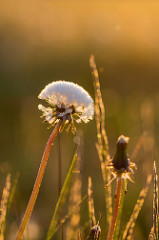

Image (CC BY 2.0)  by Susanne Nilsson



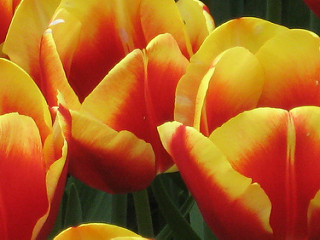

Image (CC BY 2.0)  by Michela Simoncini



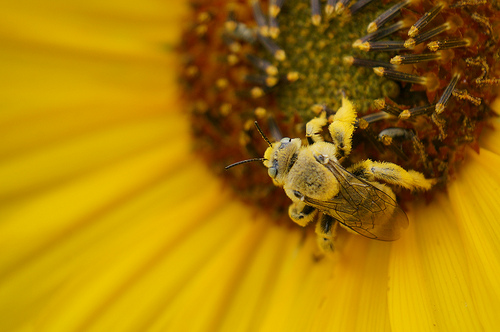

Image (CC BY 2.0)  by Mike Lewinski



In [9]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [10]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [11]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [12]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [1, 2, 2, 1, 3, 2, 1, 1, 3, 1]


In [13]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\Duongkx\\.keras\\datasets\\flower_photos\\dandelion\\4708723476_a1b476a373.jpg'

In [14]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\...


In [15]:
img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(333, 500, 3)
<dtype: 'uint8'>


In [16]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [17]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /=255.0
    
    return image

In [18]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

In [19]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [20]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [21]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [22]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

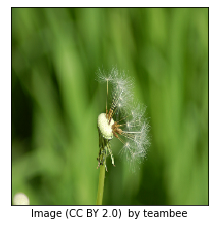

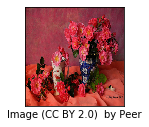

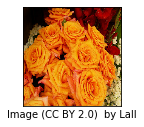

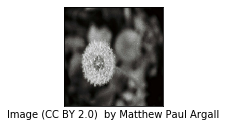

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

In [24]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [25]:
for label in label_ds.take(10):
    print(label_names[label.numpy()])

dandelion
roses
roses
dandelion
sunflowers
roses
dandelion
dandelion
sunflowers
dandelion


In [26]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [27]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [28]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [29]:
BATCH_SIZE = 32

ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)

ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [30]:
ds = image_label_ds.apply(
        tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

W0828 15:03:19.109781 11348 deprecation.py:323] From <ipython-input-30-8c4e3cbb9e40>:2: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [31]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [32]:
def change_range(image, label):
    return 2*image-1, label

keras_ds = ds.map(change_range)

In [33]:
image_batch, label_batch = next(iter(keras_ds))

In [34]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [35]:
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names), activation = 'softmax')
])

In [36]:
logit_batch = model(image_batch).numpy()

print("min logit: ", logit_batch.min())
print("max logit: ", logit_batch.max())
print()

print("Shape: ", logit_batch.shape)

min logit:  0.0009447968
max logit:  0.9595033

Shape:  (32, 5)


In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
len(model.trainable_variables)

2

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [41]:
model.fit(ds, epochs=1, steps_per_epoch=3)

Train for 3 steps
3/3 [==============================] - 19s 6s/step - loss: 1.9660 - accuracy: 0.2292


In [42]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
    overall_start = time.time()
    
    it = iter(ds.take(steps+1))
    next(it)
    
    start = time.time()
    for i, (images, labels) in enumerate(it):
        if i%10 == 0:
            print('.', end='')
    print()
    end = time.time()
    
    duration = end-start
    
    print("{} batches: {} s".format(steps, duration))
    print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
    print("Total time: {}s".format(end-overall_start))

In [43]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [44]:
timeit(ds)

........................
231.0 batches: 25.377516984939575 s
291.28145 Images/s
Total time: 36.148236989974976s


In [45]:
ds = image_label_ds.cache()
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [46]:
timeit(ds)

........................
231.0 batches: 2.049997091293335 s
3605.85877 Images/s
Total time: 13.426898002624512s


In [47]:
timeit(ds)

........................
231.0 batches: 2.0579988956451416 s
3591.83866 Images/s
Total time: 2.0899946689605713s


In [48]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [49]:
timeit(ds)

........................
231.0 batches: 22.29200315475464 s
331.59873 Images/s
Total time: 33.381526470184326s


In [50]:
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

In [51]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [52]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [53]:
timeit(ds)

........................
231.0 batches: 17.900995016098022 s
412.93794 Images/s
Total time: 25.738672733306885s


In [55]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [56]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [57]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)

In [58]:
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
    result = tf.io.parse_tensor(x, out_type=tf.float32)
    result = tf.reshape(result, [192, 192, 3])
    return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [59]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [60]:
timeit(ds)

........................
231.0 batches: 17.48737335205078 s
422.70499 Images/s
Total time: 23.61448097229004s


In [61]:
timeit(ds)

........................
231.0 batches: 16.79048490524292 s
440.24935 Images/s
Total time: 23.561525344848633s
